# Sieci neuronowe
<br>Filip Patuła s28615, Michał Bedra s28854
<br>Instrukcje do bibliotek
<br>https://www.tensorflow.org/tutorials/quickstart/beginner?hl=pl https://scikit-learn.org/stable/ https://keras.io/api/
<br>Import potrzebnych do zadania bibliotek

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf
import numpy as np

## Dane car evaluation
Ładowanie danych samochodowych i wstępne przygotowanie https://archive.ics.uci.edu/dataset/19/car+evaluation

In [2]:
car_data = pd.read_csv('car.csv')
classes = ['unacceptable', 'acceptable', 'good', 'very good']
print(car_data.head())

categorical_car_columns = car_data.select_dtypes(include=['object', 'category']).columns

for column in categorical_car_columns:
    encoder = preprocessing.LabelEncoder()
    car_data[column] = encoder.fit_transform(car_data[column])

X_car = car_data.iloc[:, :-1]
Y_car = car_data.iloc[:, -1]

x_car_train, x_car_test, y_car_train, y_car_test = train_test_split(X_car, Y_car, test_size=0.2, random_state=42)

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


Trenowanie modelu drzewa decyzyjnego, prezentacja wytrenowanego modelu oraz jego metryk jakości klasyfikacji

              precision    recall  f1-score   support

           0       0.95      0.72      0.82        83
           1       0.45      0.82      0.58        11
           2       0.96      0.99      0.97       235
           3       0.81      1.00      0.89        17

    accuracy                           0.92       346
   macro avg       0.79      0.88      0.82       346
weighted avg       0.93      0.92      0.92       346



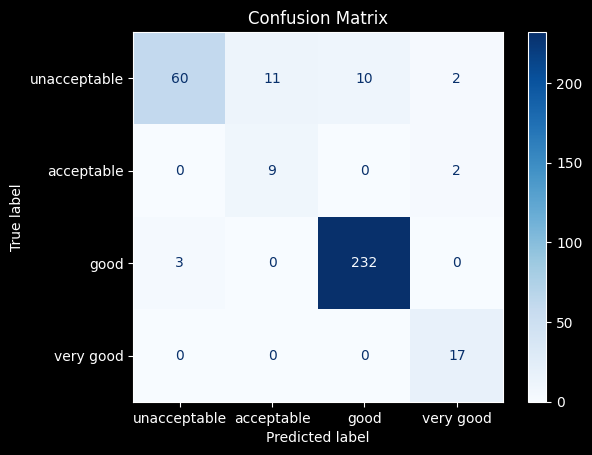

In [3]:
tree_classifier = tree.DecisionTreeClassifier(ccp_alpha=0.005)
tree_classifier = tree_classifier.fit(x_car_train, y_car_train)
test_predictions = tree_classifier.predict(x_car_test)
cm = metrics.confusion_matrix(y_car_test, test_predictions)
report_tree = metrics.classification_report(y_car_test, test_predictions)
print(report_tree)
cm_tree_display = metrics.ConfusionMatrixDisplay.from_estimator(
    tree_classifier,
    x_car_test,
    y_car_test,
    display_labels=classes,
    cmap=plt.cm.Blues)
cm_tree_display.ax_.set_title("Confusion Matrix")
plt.show()

Trenowanie sieci neuronowej dla zestawu danych, prezentacja wytrenowanego modelu oraz jego metryk jakości klasyfikacji

Epoch 1/60
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0034   
Epoch 2/60
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7854 
Epoch 3/60
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7160 
Epoch 4/60
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6674 
Epoch 5/60
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6266 
Epoch 6/60
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5907 
Epoch 7/60
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5593 
Epoch 8/60
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5250 
Epoch 9/60
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4989 
Epoch 10/60
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4635 
Epoch 11/60
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4337 
Epoch 12/60
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4030 
Epoch 13/60
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3750 
Epoch 14/60
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - loss: 0.3521
Epoch 15/60
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3194 
E

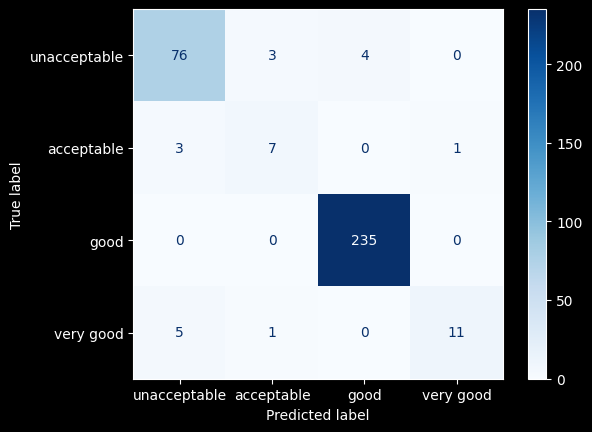

In [4]:
car_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(6,)),
    tf.keras.layers.Dense(units=72, activation="relu"),
    tf.keras.layers.Dense(units=24, activation="relu"),
    tf.keras.layers.Dense(units=12, activation="relu"),
    tf.keras.layers.Dense(units=4, activation="softmax")
])
car_model.compile(
    optimizer="Adam",
    loss='sparse_categorical_crossentropy'
)
car_model.fit(x_car_train, y_car_train, epochs=60)

neural_predictions = car_model.predict(x_car_test)
normalized_predictions = np.argmax(a=neural_predictions, axis=1)

report_neural = metrics.classification_report(y_car_test, normalized_predictions)
print(report_neural)
cm_neural_display = metrics.ConfusionMatrixDisplay.from_predictions(
    y_true=y_car_test,
    y_pred=normalized_predictions,
    display_labels=classes,
    cmap=plt.cm.Blues)
plt.show()

## Porównanie modeli
Model wykorzystujący sieci neuronowe wypada w każdym aspekcie lepiej od modelu drzewa decyzyjnego, chociaż w przypadku tych danych różnice nie są aż tak znaczące. Natomiast warto zaznaczyć, że sieć neuronowa w porównaniu jest bardziej skomplikowana i wymaga również więcej czasu i zasobów poświęconych na trenowanie i optymalizację parametrów.

## Pobrania danych CIFAR10, trenowanie sieci neuronowej do rozpoznawania zwierząt

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.9021
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.7337
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.6529
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.5955
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.5593
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.5350
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.5122
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.4939
Epoch 9/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.4701
Epoch 10/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.4580
Epoch 11/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.4425
Epoch 12/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.4332
Epoch 13/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.4156
Epoch 14/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.4075
Epoch 15/30
1563/1563 ━━━━━━━

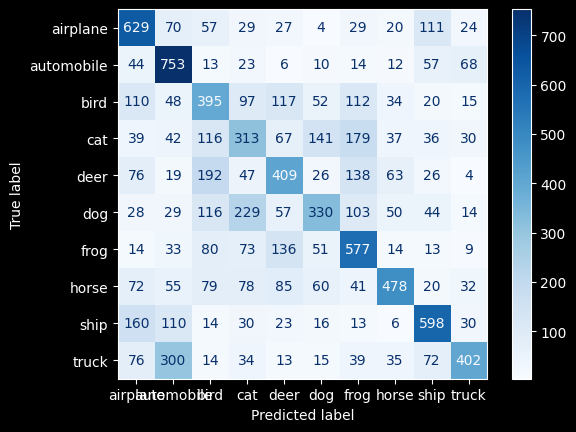

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1.8785
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.7059
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.6475
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.6110
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.5922
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.5707
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.5584
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.5380
Epoch 9/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.5279
Epoch 10/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.5175
Epoch 11/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.5112
Epoch 12/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.5045
Epoch 13/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.4924
Epoch 14/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.4832
Epoch 15/30
1563/1563 ━━━━━━━

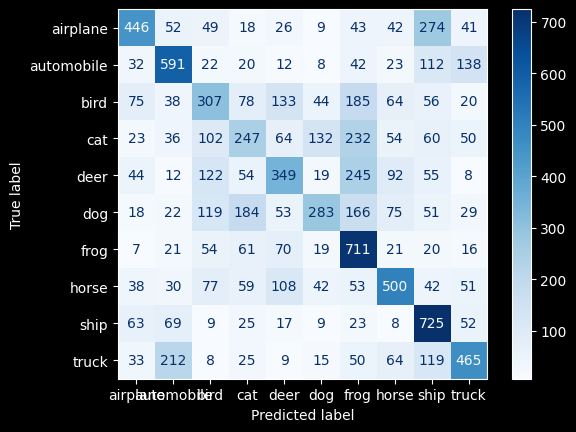

In [16]:
cifar10 = tf.keras.datasets.cifar10
(train_cifar_images, train_cifar_labels), (test_cifar_images, test_cifar_labels) = cifar10.load_data()
train_cifar_images = train_cifar_images / 255.
test_cifar_images = test_cifar_images / 255
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
cifar10_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
cifar10_model.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy'
)
cifar10_model.fit(train_cifar_images, train_cifar_labels, epochs=30)

cifar_predictions = cifar10_model.predict(test_cifar_images)
cifar_normalized_predictions = np.argmax(a=cifar_predictions, axis=1)

report_cifar = metrics.classification_report(test_cifar_labels, cifar_normalized_predictions)
print(report_cifar)
cm_cifar_neural_display = metrics.ConfusionMatrixDisplay.from_predictions(
    y_true=test_cifar_labels,
    y_pred=cifar_normalized_predictions,
    display_labels=cifar_classes,
    cmap=plt.cm.Blues)
plt.show()

cifar10_alternative_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
cifar10_alternative_model.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy'
)
cifar10_alternative_model.fit(train_cifar_images, train_cifar_labels, epochs=30)

cifar_alternative_predictions = cifar10_alternative_model.predict(test_cifar_images)
cifar_alternative_normalized_predictions = np.argmax(a=cifar_alternative_predictions, axis=1)

report_cifar_alternative = metrics.classification_report(test_cifar_labels, cifar_alternative_normalized_predictions)
print(report_cifar_alternative)
cm_cifar_alternative_neural_display = metrics.ConfusionMatrixDisplay.from_predictions(
    y_true=test_cifar_labels,
    y_pred=cifar_alternative_normalized_predictions,
    display_labels=cifar_classes,
    cmap=plt.cm.Blues)
plt.show()

## Wnioski dla zestawu CIFAR10
Przy wykorzystaniu podstawowych typów warst sieci neuronowej model radzi sobie średnio na poziomie blisko 50%. Porównując dwie sieci, to ta z większą ilością warstw głębokich radzi sobie trochę lepiej, uzyskując wynik trafności na poziomie 49%. Przy wykorzystaniu innych typów warstw prawdopodobnie  wynik byłby lepszy.

## Pobrania danych fashion MNIST, trenowanie sieci neuronowej do rozpoznawania ubrać

Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.5013
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3772
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3397
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3164
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2973
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2832
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1000
           1       1.00      0.95      0.97      1000
           2       0.77      0.80      0.79      1000
           3       0.81      0.93      0.86      1000
           4       0.78      0.81      0.79      1000
           5       0.98      0.94      0.96      1000
           6       0.75      0.62      0.68      1000
           7       0.95      0.94      0.94      1000
           8       0.96      0.98      0.97      1000
        

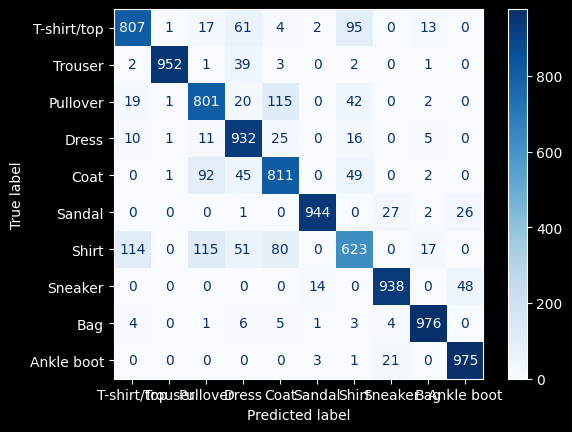

In [20]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_mnist_images, train_mnist_labels), (test_mnist_images, test_mnist_labels) = fashion_mnist.load_data()
train_mnist_images = train_mnist_images / 255.
test_mnist_images = test_mnist_images / 255
fashion_classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
fashion_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
fashion_model.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy'
)
fashion_model.fit(train_mnist_images, train_mnist_labels, epochs=6)

fashion_neural_predictions = fashion_model.predict(test_mnist_images)
fashion_normalized_predictions = np.argmax(a=fashion_neural_predictions, axis=1)

report_fashion_neural = metrics.classification_report(test_mnist_labels, fashion_normalized_predictions)
print(report_fashion_neural)
cm_fashion_neural_display = metrics.ConfusionMatrixDisplay.from_predictions(
    y_true=test_mnist_labels,
    y_pred=fashion_normalized_predictions,
    display_labels=fashion_classes,
    cmap=plt.cm.Blues)
plt.show()

## Wnioski dla zestawu MNIST FASHION
Przy wykorzystaniu podstawowych typów warst sieci neuronowej model radzi sobie całkiem dobrze i osiąga tranfność na poziomie 88% przy małej liczbie generacji do trenowania modelu. Wykorzystując inne typy warstw prawdopodobnie nadal można polepszyc wyniki.

## Pobrania danych kidney function health, trenowanie sieci neuronowej do przewidywania CKD status, wyniki i raport
Dane: https://www.kaggle.com/datasets/miadul/kidney-function-health-dataset

Epoch 1/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 866us/step - loss: 8.3897 
Epoch 2/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - loss: 0.9875
Epoch 3/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - loss: 0.3285
Epoch 4/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 0.2652
Epoch 5/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - loss: 0.2653
Epoch 6/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - loss: 0.1206
Epoch 7/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 0.1107
Epoch 8/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 0.0941
Epoch 9/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - loss: 0.0765
Epoch 10/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 0.0793
Epoch 11/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 0.0827
Epoch 12/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 0.1726
Epoch 13/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 0.1287
Epoch 14/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 0.1245
Epoch 15/15
125/125 ━━━━━━━━

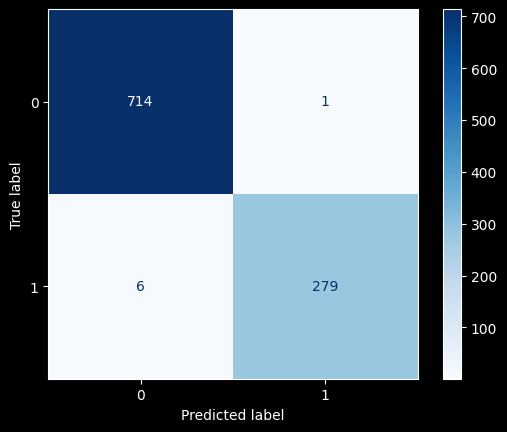

In [46]:
kidney_data = pd.read_csv('kidney_dataset.csv')
categorical_kidney_columns = kidney_data.select_dtypes(include=['object', 'category']).columns
ckd_classes = ['0', '1']

for column in categorical_kidney_columns:
    encoder = preprocessing.LabelEncoder()
    kidney_data[column] = encoder.fit_transform(kidney_data[column])

X_kidney = kidney_data.iloc[:, :-1]
Y_kidney = kidney_data.iloc[:, -1]

x_kidney_train, x_kidney_test, y_kidney_train, y_kidney_test = train_test_split(X_kidney, Y_kidney, test_size=0.2, random_state=42)

kidney_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(10,)),
    tf.keras.layers.Dense(units=40, activation="relu"),
    tf.keras.layers.Dense(2, activation="softmax")
])
kidney_model.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy'
)
kidney_model.fit(x_kidney_train, y_kidney_train, epochs=15)

kidney_neural_predictions = kidney_model.predict(x_kidney_test)
kidney_normalized_predictions = np.argmax(a=kidney_neural_predictions, axis=1)

report_kidney_neural = metrics.classification_report(y_kidney_test, kidney_normalized_predictions)
print(report_kidney_neural)
cm_fashion_neural_display = metrics.ConfusionMatrixDisplay.from_predictions(
    y_true=y_kidney_test,
    y_pred=kidney_normalized_predictions,
    display_labels=ckd_classes,
    cmap=plt.cm.Blues)
plt.show()

## Wnioski dla danych kidney function health
W przypadku tych danych mała sieć neuronowa jest w stanie przewidzieć z bardzo dużą trafnością wskaźnik CKD (99%). Czas trenowania sieci również nie jest długi. Możliwe, że przy większym i bardziej zróżnicowanym zbiorze danych wyniki byłyby gorsze.